In [1]:
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
evaluation_results = "../evaluation-results"

data = []
for d in os.listdir(evaluation_results):
    if d.startswith('iteration-'):
        iteration = int(d[10:])
        subdir = os.path.join(evaluation_results, d)
        for d2 in os.listdir(subdir):
            if os.path.isdir(os.path.join(subdir, d2)):
                shuffle_dir = os.path.join(subdir, d2)
                for file in os.listdir(shuffle_dir):
                    if file.endswith('-results.csv'):
                        df = pd.read_csv(os.path.join(shuffle_dir, file), index_col=0)
                        df['trial'] = iteration
                        minimum_test = df[' Test error(px)'].idxmin()
                        minimum_test_withp = df['Test error with p-cutoff'].idxmin()
                        data.append(df.iloc[minimum_test:minimum_test+1, :])
                        if minimum_test != minimum_test_withp:
                            data.append(df.iloc[minimum_test_withp:minimum_test_withp+1, :])
df = pd.concat(data)

In [7]:
df[df['trial'] == 3].sort_values(by=' Test error(px)', axis='index')

,Training iterations:,%Training dataset,Shuffle number,Train error(px),Test error(px),p-cutoff used,Train error with p-cutoff,Test error with p-cutoff,trial
0,110000,90,4,13.97,15.02,0.85,5.74,7.59,3
1,120000,90,9,11.42,15.73,0.85,5.49,7.83,3
4,150000,90,3,13.07,16.26,0.85,5.17,6.45,3
3,140000,90,0,10.77,16.47,0.85,4.67,6.92,3
2,130000,90,3,12.85,16.55,0.85,5.15,6.06,3
0,110000,90,9,11.24,17.04,0.85,5.48,7.75,3
5,160000,90,7,10.90,17.80,0.85,4.61,7.18,3
2,130000,90,8,12.44,17.98,0.85,4.24,7.19,3
1,120000,90,8,12.64,18.05,0.85,4.56,7.18,3
7,180000,90,2,11.14,18.32,0.85,4.37,12.41,3


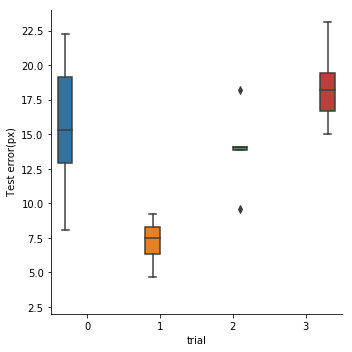

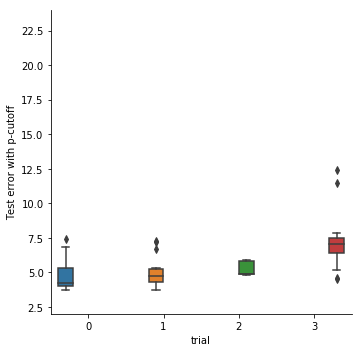

In [7]:
sb.catplot(data=df, x='trial', y=' Test error(px)', hue='trial', kind='box')
plt.ylim(2, 24)
plt.savefig('test_error.png')

sb.catplot(data=df, x='trial', y='Test error with p-cutoff', hue='trial', kind='box')
plt.ylim(2, 24)
plt.savefig('test_error_withp.png')
